In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

In [3]:
data = pd.read_csv("/content/drive/MyDrive/Phishing/UNB/Binary/Base_classifier_result(URL cross).csv")
data.head()

,labels,dt_prediction_non,dt_prediction_phish,knn_prediction_non,knn_prediction_phish,XGB_prediction_non,XGB_prediction_phish
0,0,0.998125,0.001875,1.000000,0.000000,0.997370,0.002630
1,0,0.827225,0.172775,1.000000,0.000000,0.922162,0.077838
2,1,0.004049,0.995951,0.000000,1.000000,0.004733,0.995267
3,1,0.048276,0.951724,0.142857,0.857143,0.009208,0.990792
4,0,0.827225,0.172775,1.000000,0.000000,0.908173,0.091827


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   labels                2938 non-null   int64  
 1   dt_prediction_non     2938 non-null   float64
 2   dt_prediction_phish   2938 non-null   float64
 3   knn_prediction_non    2938 non-null   float64
 4   knn_prediction_phish  2938 non-null   float64
 5   XGB_prediction_non    2938 non-null   float64
 6   XGB_prediction_phish  2938 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 160.8 KB


In [5]:
import numpy as np


y = data['labels'].values
x = np.array(data.drop('labels',axis=1))


print(x.shape, y.shape)

(2938, 6) (2938,)


In [6]:

import keras
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

def model_aa(x_train, x_val, y_train, y_val, opt, early_stopping_monitor):

  n_cols = x_train.shape[1]
  #create model
  model = Sequential()
  model.add(Dense(5, input_dim=6, activation='relu'))
  model.add(Dense(1, activation='sigmoid'))
  
  #compile model using mse as a measure of model performance
  model.compile(optimizer = opt, loss= 'binary_crossentropy', metrics=["accuracy"])

  history = model.fit(x_train, y_train, epochs=100, validation_data=(x_val, y_val), callbacks=[early_stopping_monitor])


  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Training Loss', 'Validation Loss'], loc='upper right')
  plt.show()


  print('Validation Accuracy: ')
  # Predicting the Test set results
  y_pred = model.predict(x_val)
  y_pred = (y_pred > 0.5)


  print(classification_report(y_val, y_pred))

  # Model Accuracy, how often is the classifier correct?
  print("Accuracy:",metrics.accuracy_score(y_val, y_pred))

  # Creating the Confusion Matrix
  cm = confusion_matrix(y_val, y_pred)
  print(cm)
  print('Precision: %.4f' % precision_score(y_val, y_pred))
  print('Recall: %.4f' % recall_score(y_val, y_pred))
  print('F1 Score: %.4f' % f1_score(y_val, y_pred))
  tn, fp, fn, tp = confusion_matrix(list(y_val), list(y_pred), labels=[0, 1]).ravel()

  print('True Positive', tp)
  print('True Negative', tn)
  print('False Positive', fp)
  print('False Negative', fn)

  return metrics.accuracy_score(y_val, y_pred)



Epoch 1/100
83/83 [==============================] - 1s 4ms/step - loss: 0.8999 - accuracy: 0.2481 - val_loss: 0.8047 - val_accuracy: 0.2619
Epoch 2/100
83/83 [==============================] - 0s 2ms/step - loss: 0.7516 - accuracy: 0.2481 - val_loss: 0.6719 - val_accuracy: 0.2619
Epoch 3/100
83/83 [==============================] - 0s 2ms/step - loss: 0.6326 - accuracy: 0.4240 - val_loss: 0.5738 - val_accuracy: 0.9354
Epoch 4/100
83/83 [==============================] - 0s 2ms/step - loss: 0.5531 - accuracy: 0.9247 - val_loss: 0.5047 - val_accuracy: 0.9660
Epoch 5/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4868 - accuracy: 0.9580 - val_loss: 0.4414 - val_accuracy: 0.9694
Epoch 6/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4262 - accuracy: 0.9569 - val_loss: 0.3837 - val_accuracy: 0.9660
Epoch 7/100
83/83 [==============================] - 0s 2ms/step - loss: 0.3723 - accuracy: 0.9592 - val_loss: 0.3329 - val_accuracy: 0.9694
Epoch 8/100
8

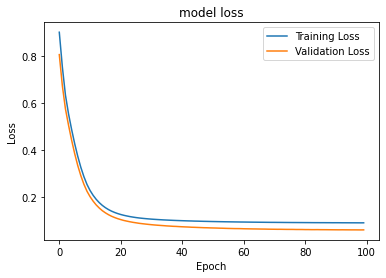

Validation Accuracy: 
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       217
           1       0.97      0.94      0.95        77

    accuracy                           0.98       294
   macro avg       0.98      0.96      0.97       294
weighted avg       0.98      0.98      0.98       294

Accuracy: 0.9761904761904762
[[215   2]
 [  5  72]]
Precision: 0.9730
Recall: 0.9351
F1 Score: 0.9536
True Positive 72
True Negative 215
False Positive 2
False Negative 5
Epoch 1/100
83/83 [==============================] - 1s 4ms/step - loss: 0.3323 - accuracy: 0.9667 - val_loss: 0.2343 - val_accuracy: 0.9660
Epoch 2/100
83/83 [==============================] - 0s 2ms/step - loss: 0.1900 - accuracy: 0.9682 - val_loss: 0.1749 - val_accuracy: 0.9524
Epoch 3/100
83/83 [==============================] - 0s 2ms/step - loss: 0.1483 - accuracy: 0.9682 - val_loss: 0.1496 - val_accuracy: 0.9524
Epoch 4/100
83/83 [==============================] - 0s 2

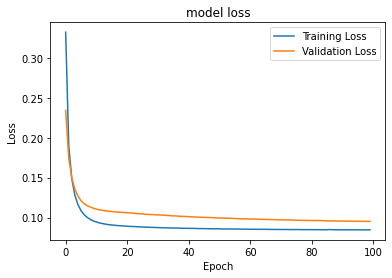

Validation Accuracy: 
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       215
           1       0.94      0.94      0.94        79

    accuracy                           0.97       294
   macro avg       0.96      0.96      0.96       294
weighted avg       0.97      0.97      0.97       294

Accuracy: 0.9659863945578231
[[210   5]
 [  5  74]]
Precision: 0.9367
Recall: 0.9367
F1 Score: 0.9367
True Positive 74
True Negative 210
False Positive 5
False Negative 5
Epoch 1/100
83/83 [==============================] - 1s 6ms/step - loss: 0.3770 - accuracy: 0.9580 - val_loss: 0.2161 - val_accuracy: 0.9932
Epoch 2/100
83/83 [==============================] - 0s 2ms/step - loss: 0.2035 - accuracy: 0.9588 - val_loss: 0.1226 - val_accuracy: 0.9932
Epoch 3/100
83/83 [==============================] - 0s 2ms/step - loss: 0.1517 - accuracy: 0.9595 - val_loss: 0.0868 - val_accuracy: 0.9932
Epoch 4/100
83/83 [==============================] - 0s 2

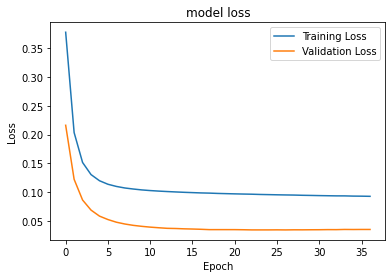

Validation Accuracy: 
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       220
           1       0.99      0.97      0.98        74

    accuracy                           0.99       294
   macro avg       0.99      0.98      0.99       294
weighted avg       0.99      0.99      0.99       294

Accuracy: 0.9897959183673469
[[219   1]
 [  2  72]]
Precision: 0.9863
Recall: 0.9730
F1 Score: 0.9796
True Positive 72
True Negative 219
False Positive 1
False Negative 2
Epoch 1/100
83/83 [==============================] - 1s 4ms/step - loss: 0.5132 - accuracy: 0.9293 - val_loss: 0.3834 - val_accuracy: 0.9626
Epoch 2/100
83/83 [==============================] - 0s 2ms/step - loss: 0.3061 - accuracy: 0.9667 - val_loss: 0.2369 - val_accuracy: 0.9592
Epoch 3/100
83/83 [==============================] - 0s 2ms/step - loss: 0.1980 - accuracy: 0.9686 - val_loss: 0.1702 - val_accuracy: 0.9558
Epoch 4/100
83/83 [==============================] - 0s 2

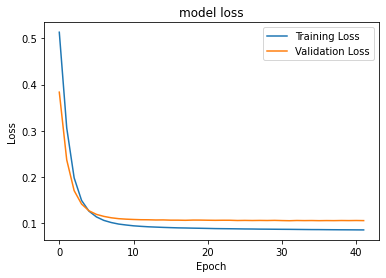

Validation Accuracy: 
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       214
           1       0.93      0.89      0.91        80

    accuracy                           0.95       294
   macro avg       0.95      0.93      0.94       294
weighted avg       0.95      0.95      0.95       294

Accuracy: 0.9523809523809523
[[209   5]
 [  9  71]]
Precision: 0.9342
Recall: 0.8875
F1 Score: 0.9103
True Positive 71
True Negative 209
False Positive 5
False Negative 9
Epoch 1/100
83/83 [==============================] - 1s 4ms/step - loss: 0.6532 - accuracy: 0.6104 - val_loss: 0.4442 - val_accuracy: 0.9762
Epoch 2/100
83/83 [==============================] - 0s 2ms/step - loss: 0.3651 - accuracy: 0.9595 - val_loss: 0.2939 - val_accuracy: 0.9796
Epoch 3/100
83/83 [==============================] - 0s 2ms/step - loss: 0.2595 - accuracy: 0.9599 - val_loss: 0.2155 - val_accuracy: 0.9796
Epoch 4/100
83/83 [==============================] - 0s 2

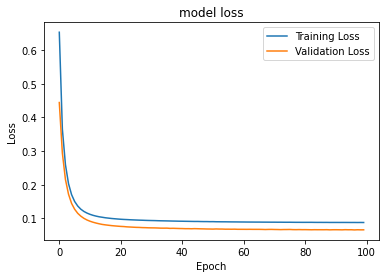

Validation Accuracy: 
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       224
           1       0.94      0.97      0.96        70

    accuracy                           0.98       294
   macro avg       0.97      0.98      0.97       294
weighted avg       0.98      0.98      0.98       294

Accuracy: 0.9795918367346939
[[220   4]
 [  2  68]]
Precision: 0.9444
Recall: 0.9714
F1 Score: 0.9577
True Positive 68
True Negative 220
False Positive 4
False Negative 2
Epoch 1/100
83/83 [==============================] - 1s 5ms/step - loss: 0.6074 - accuracy: 0.8173 - val_loss: 0.5571 - val_accuracy: 0.9456
Epoch 2/100
83/83 [==============================] - 0s 3ms/step - loss: 0.5107 - accuracy: 0.9588 - val_loss: 0.4989 - val_accuracy: 0.9422
Epoch 3/100
83/83 [==============================] - 0s 3ms/step - loss: 0.4619 - accuracy: 0.9618 - val_loss: 0.4648 - val_accuracy: 0.9422
Epoch 4/100
83/83 [==============================] - 0s 3

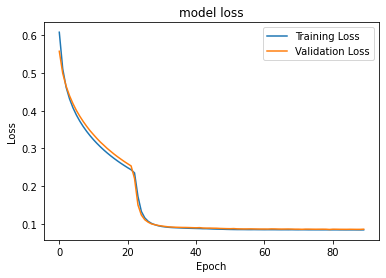

Validation Accuracy: 
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       231
           1       0.91      0.94      0.92        63

    accuracy                           0.97       294
   macro avg       0.95      0.96      0.95       294
weighted avg       0.97      0.97      0.97       294

Accuracy: 0.9659863945578231
[[225   6]
 [  4  59]]
Precision: 0.9077
Recall: 0.9365
F1 Score: 0.9219
True Positive 59
True Negative 225
False Positive 6
False Negative 4
Epoch 1/100
83/83 [==============================] - 1s 4ms/step - loss: 0.2778 - accuracy: 0.9433 - val_loss: 0.2167 - val_accuracy: 0.9490
Epoch 2/100
83/83 [==============================] - 0s 2ms/step - loss: 0.1643 - accuracy: 0.9546 - val_loss: 0.1749 - val_accuracy: 0.9456
Epoch 3/100
83/83 [==============================] - 0s 2ms/step - loss: 0.1355 - accuracy: 0.9595 - val_loss: 0.1569 - val_accuracy: 0.9456
Epoch 4/100
83/83 [==============================] - 0s 2

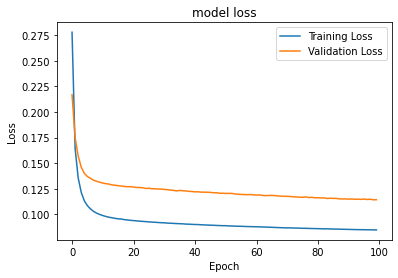

Validation Accuracy: 
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       214
           1       0.96      0.89      0.92        80

    accuracy                           0.96       294
   macro avg       0.96      0.94      0.95       294
weighted avg       0.96      0.96      0.96       294

Accuracy: 0.9591836734693877
[[211   3]
 [  9  71]]
Precision: 0.9595
Recall: 0.8875
F1 Score: 0.9221
True Positive 71
True Negative 211
False Positive 3
False Negative 9
Epoch 1/100
83/83 [==============================] - 1s 4ms/step - loss: 0.7000 - accuracy: 0.5223 - val_loss: 0.6355 - val_accuracy: 0.7653
Epoch 2/100
83/83 [==============================] - 0s 3ms/step - loss: 0.6009 - accuracy: 0.7489 - val_loss: 0.5467 - val_accuracy: 0.7653
Epoch 3/100
83/83 [==============================] - 0s 2ms/step - loss: 0.5034 - accuracy: 0.7489 - val_loss: 0.4329 - val_accuracy: 0.7653
Epoch 4/100
83/83 [==============================] - 0s 3

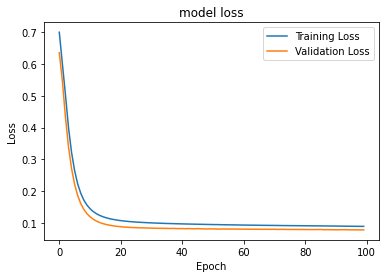

Validation Accuracy: 
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       225
           1       0.92      0.96      0.94        69

    accuracy                           0.97       294
   macro avg       0.95      0.96      0.96       294
weighted avg       0.97      0.97      0.97       294

Accuracy: 0.9693877551020408
[[219   6]
 [  3  66]]
Precision: 0.9167
Recall: 0.9565
F1 Score: 0.9362
True Positive 66
True Negative 219
False Positive 6
False Negative 3
Epoch 1/100
83/83 [==============================] - 1s 4ms/step - loss: 0.5809 - accuracy: 0.7921 - val_loss: 0.4559 - val_accuracy: 0.9181
Epoch 2/100
83/83 [==============================] - 0s 3ms/step - loss: 0.3704 - accuracy: 0.9520 - val_loss: 0.3433 - val_accuracy: 0.9181
Epoch 3/100
83/83 [==============================] - 0s 3ms/step - loss: 0.2631 - accuracy: 0.9565 - val_loss: 0.2694 - val_accuracy: 0.9283
Epoch 4/100
83/83 [==============================] - 0s 2

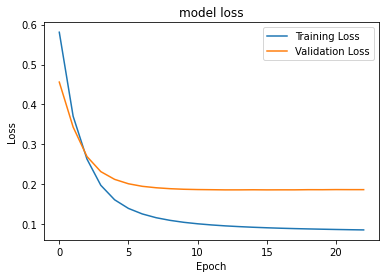

Validation Accuracy: 
              precision    recall  f1-score   support

           0       0.94      0.97      0.95       215
           1       0.90      0.83      0.87        78

    accuracy                           0.93       293
   macro avg       0.92      0.90      0.91       293
weighted avg       0.93      0.93      0.93       293

Accuracy: 0.931740614334471
[[208   7]
 [ 13  65]]
Precision: 0.9028
Recall: 0.8333
F1 Score: 0.8667
True Positive 65
True Negative 208
False Positive 7
False Negative 13
Epoch 1/100
83/83 [==============================] - 1s 4ms/step - loss: 0.8598 - accuracy: 0.2544 - val_loss: 0.6699 - val_accuracy: 0.2423
Epoch 2/100
83/83 [==============================] - 0s 2ms/step - loss: 0.5911 - accuracy: 0.7909 - val_loss: 0.5324 - val_accuracy: 0.9590
Epoch 3/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4998 - accuracy: 0.9599 - val_loss: 0.4806 - val_accuracy: 0.9693
Epoch 4/100
83/83 [==============================] - 0s 2

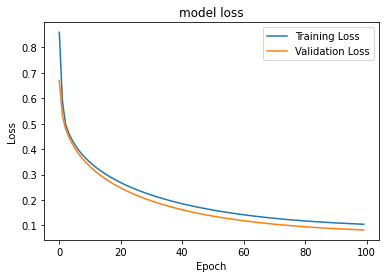

Validation Accuracy: 
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       230
           1       0.94      0.92      0.93        63

    accuracy                           0.97       293
   macro avg       0.96      0.95      0.95       293
weighted avg       0.97      0.97      0.97       293

Accuracy: 0.9692832764505119
[[226   4]
 [  5  58]]
Precision: 0.9355
Recall: 0.9206
F1 Score: 0.9280
True Positive 58
True Negative 226
False Positive 4
False Negative 5
Average Validation Accuracy: 0.9659527292145527


In [7]:
from sklearn.model_selection import KFold
import tensorflow as tf

optimizer1=tf.keras.optimizers.Adam(learning_rate=0.0005)


from keras.callbacks import EarlyStopping
#set early stopping monitor so the model stops training when it won't improve anymore
early_stopping_monitor = EarlyStopping(patience=10)
n_split = 10
acc = 0

kf = KFold(n_split, random_state=10, shuffle=True)
for train, val in kf.split(x, y):
  val_acc = model_aa(x[train], x[val], y[train], y[val], optimizer1, early_stopping_monitor)
  acc = acc + val_acc

print("Average Validation Accuracy:",acc/n_split)

